In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [3]:
df=pd.read_csv('data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
for col in df.columns:
    print(col+"------------")
    print(df[col].value_counts())
    print('-----------')

credit.policy------------
1    7710
0    1868
Name: credit.policy, dtype: int64
-----------
purpose------------
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
-----------
int.rate------------
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: int.rate, Length: 249, dtype: int64
-----------
installment------------
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64
-----------
log.annual.inc------------
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.11047

In [9]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [11]:
df.groupby('not.fully.paid')['credit.policy'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,0.832318,0.373607,0.0,1.0,1.0,1.0,1.0
1,1533.0,0.661448,0.473372,0.0,0.0,1.0,1.0,1.0


<Axes: xlabel='not.fully.paid', ylabel='Count'>

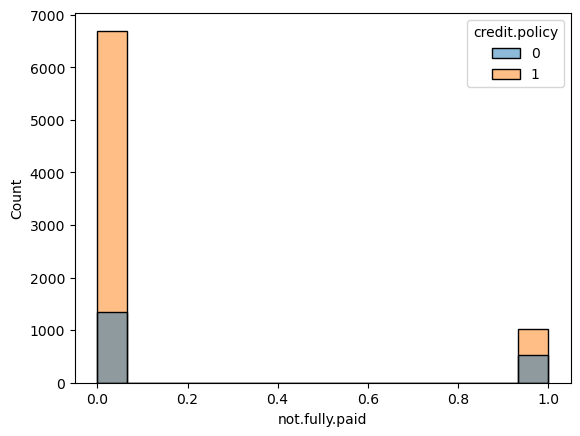

In [15]:
sns.histplot(data=df,x='not.fully.paid',hue='credit.policy')

<Axes: xlabel='count', ylabel='purpose'>

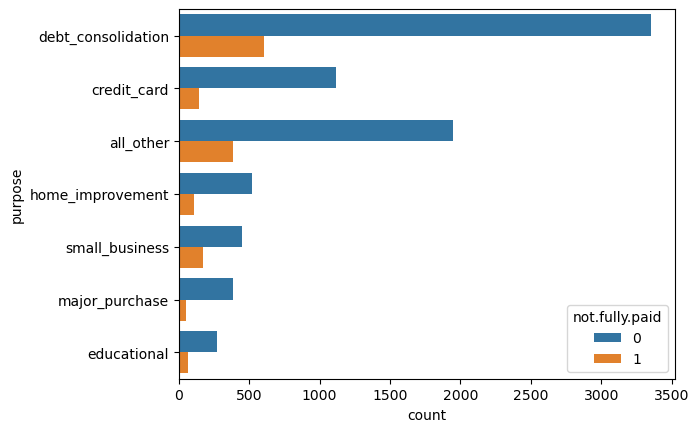

In [17]:
sns.countplot(data=df,y='purpose',hue='not.fully.paid')

In [22]:
df_2=df.groupby('purpose')['not.fully.paid'].mean().reset_index()
df_2

,purpose,not.fully.paid
0,all_other,0.166023
1,credit_card,0.115689
2,debt_consolidation,0.152388
3,educational,0.201166
4,home_improvement,0.170111
5,major_purchase,0.112128
6,small_business,0.277868


<Axes: xlabel='not.fully.paid', ylabel='purpose'>

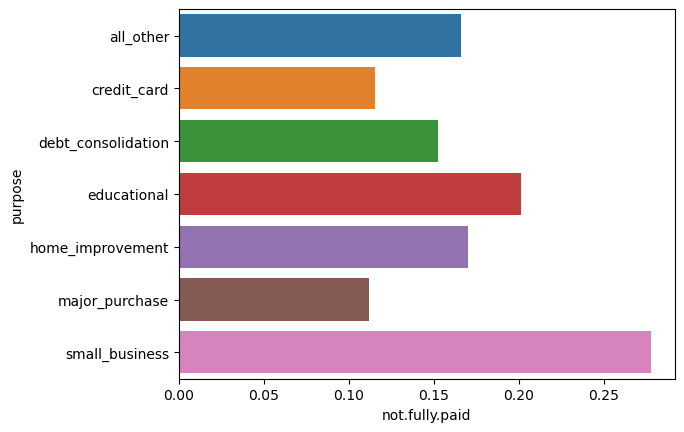

In [29]:
sns.barplot(data=df_2,y='purpose',x='not.fully.paid')

<Axes: xlabel='not.fully.paid', ylabel='log.annual.inc'>

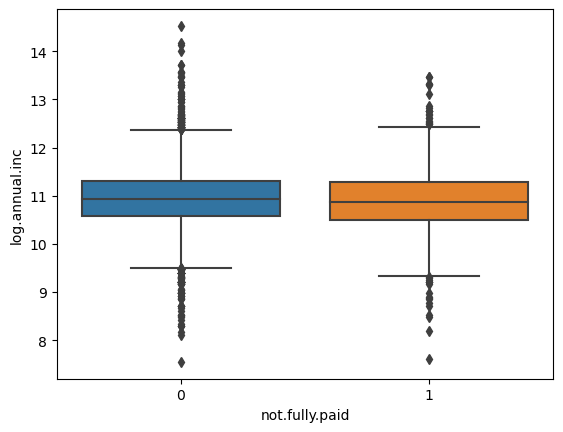

In [30]:
sns.boxplot(data=df,y='log.annual.inc',x='not.fully.paid')

In [31]:
df=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [32]:
x=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [33]:
sampler=RandomUnderSampler()

In [34]:
x,y=sampler.fit_resample(x,y)

In [35]:
y.value_counts()

0    1533
1    1533
Name: not.fully.paid, dtype: int64

In [36]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
models={'LogisticRegression':LogisticRegression(),
       'KNN':KNeighborsClassifier(n_neighbors=5),
       'SVC':SVC()}

In [41]:
for name,model in models.items():
    print('--------- ',name,'-------------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('accuracy: ',accuracy_score(y_pred,y_test))
    print('confusion matrix: ',confusion_matrix(y_pred,y_test))
    print('recall score: ',recall_score(y_pred,y_test))
    print('precision score: ',precision_score(y_pred,y_test))
    print('-'*30)

---------  LogisticRegression -------------
accuracy:  0.6107491856677525
confusion matrix:  [[193 125]
 [114 182]]
recall score:  0.6148648648648649
precision score:  0.5928338762214984
------------------------------
---------  KNN -------------
accuracy:  0.5635179153094463
confusion matrix:  [[176 137]
 [131 170]]
recall score:  0.5647840531561462
precision score:  0.5537459283387622
------------------------------
---------  SVC -------------
accuracy:  0.6058631921824105
confusion matrix:  [[176 111]
 [131 196]]
recall score:  0.599388379204893
precision score:  0.6384364820846905
------------------------------


In [42]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [48]:
features=['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

In [43]:
import joblib

In [49]:
joblib.dump(model,'model.h5')
joblib.dump(features,'features.h5')
joblib.dump(scaler,'scaler.h5')


['scaler.h5']